# GRIP TASK 1
## Linear Regression with Scikit Learn
### By Jishnudeep Bhattacharjee

In this task we will use the concept of Linear Regression on a dataset of student's scores corresponding to the hours they study. Since it is a simple two column dataset with one indpendent and one dependent we will employ Simple Linear Regression using Scikit Learn, a library in Python. 

<b>Our objective is to predict the student's score if they study of 9.25 hours/day.<b>

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Importing dataset

In [2]:
student_scores = pd.read_csv("student_scores.csv")
print("Data has been imported.")
student_scores.head(8)

Data has been imported.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


### Plotting the distribution of scores

We will plot the given dataset using a scatterplot to get a visual idea of the dataset we are working with.

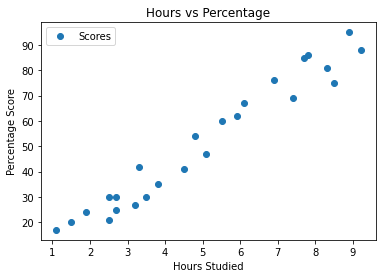

In [3]:
# Plotting the distribution of scores
student_scores.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above scatterplot, we can see that there is a positive linear relation between the two variables. This implies that the greater hours a student studies, the greater they will score.

## Splitting Dataset
The next step is to split the dependent variable ( Scores ) and the independent variable ( Hours Studied ).

In [4]:
X = student_scores.iloc[:,:-1].values
y = student_scores.iloc[:,1].values

### Implementing Train Test Split
In this step we essentially separate our split dataset into Training and Test sets. As the names imply, the training set is used to train the model and the test set is used to test the accuracy and the working of the model. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Fitting Training Data to Linear Regressor
With the split done, now is the time to train our machine learning model. We fit the training data to the regressor object in this step.

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training is completed.")

Training is completed.


### Visualizing the training results

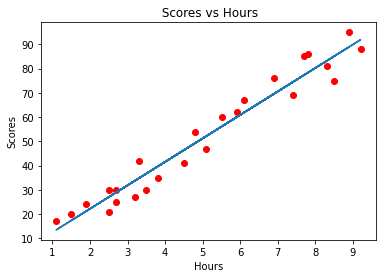

In [7]:
#plotting regression line
line = regressor.coef_*X+regressor.intercept_

#Plotting the test data
plt.scatter(X,y,color = 'red')
plt.plot(X,line)
plt.title(" Scores vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Making Predictions
Now that training is done, we can finally get to making predictions. 

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [11]:
hours = np.array(9.25)
own_pred = regressor.predict(hours.reshape(-1, 1))
print("The Number of Hours is:{}".format(hours))
print("The Predicted Score is: {}".format(own_pred[0]))

The Number of Hours is:9.25
The Predicted Score is: 92.38611528261494


### Evaluating Model
Finally, we must evaluate our model to check its accuracy by comparing it to the test set. We will employ three techniques in the metrics class of sklearn library.

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print("R2 Score:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
R2 Score: 0.9678055545167994


## Conclusion 
<b>In conclusion we see that the model's predicted score is 92.39 if a student studies for 9.25 hours a day. We have an R2 score of 96% which is pretty good in and of itself.<b> 


### Suggestion
To improve the working of the model we can include more training examples. 